# Data Preparation for Weather Prediction

This notebook implements the data preparation steps for the weather prediction dataset as outlined in the Data Preparation document.

The goal is to prepare the dataset for Random Forest modeling by:
1. Handling outliers
2. Transforming categorical variables
3. Encoding the target variable
4. Creating new features from the date

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# Load the dataset
df = pd.read_csv('weatherAUS.csv')
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (145460, 23)

First few rows:


,Tanggal,Lokasi,SuhuMin,SuhuMax,CurahHujan,Penguapan,SinarMatahari,ArahAnginKencang,KecepatanAnginKencang,ArahAnginJam9,ArahAnginJam3,KecepatanAnginJam9,KecepatanAnginJam3,KelembabanJam9,KelembabanJam3,TekananUdaraJam9,TekananUdaraJam3,AwanJam9,AwanJam3,SuhuJam9,SuhuJam3,HujanHariIni,HujanBesok
0,2010-04-30,Adelaide,10.8,21.2,0.0,1.8,6.60,ENE,22.0,ENE,NW,9.0,7.0,66.0,48.0,1028.4,1024.7,4.45,4.51,15.7,21.0,No,No
1,2014-07-22,Adelaide,3.7,19.0,0.0,1.4,7.61,N,24.0,N,NNE,0.0,11.0,75.0,32.0,1024.2,1021.1,4.45,4.51,9.6,18.5,No,No
2,2014-07-23,Adelaide,9.6,15.8,0.0,2.6,7.61,NE,52.0,NNE,NE,9.0,20.0,35.0,51.0,1017.9,1011.5,4.45,4.51,14.7,15.4,No,Yes
3,2014-07-24,Adelaide,10.1,15.5,16.6,0.8,7.61,NNE,50.0,NW,NW,17.0,26.0,96.0,80.0,1007.4,1008.0,4.45,4.51,11.2,14.0,Yes,Yes
4,2014-07-25,Adelaide,11.2,16.2,1.8,0.6,7.61,NW,30.0,WNW,WNW,13.0,15.0,89.0,70.0,1018.4,1019.2,4.45,4.51,13.0,15.3,Yes,Yes


In [3]:
# Check basic information about the dataset
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Tanggal                145460 non-null  object 
 1   Lokasi                 145460 non-null  object 
 2   SuhuMin                145460 non-null  float64
 3   SuhuMax                145460 non-null  float64
 4   CurahHujan             145460 non-null  float64
 5   Penguapan              145460 non-null  float64
 6   SinarMatahari          145460 non-null  float64
 7   ArahAnginKencang       145460 non-null  object 
 8   KecepatanAnginKencang  145460 non-null  float64
 9   ArahAnginJam9          145460 non-null  object 
 10  ArahAnginJam3          145460 non-null  object 
 11  KecepatanAnginJam9     145460 non-null  float64
 12  KecepatanAnginJam3     145460 non-null  float64
 13  KelembabanJam9         145460 non-null  float64
 14  KelembabanJam3        

In [4]:
# Check for missing values
print("Missing values per column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Missing values per column:
Series([], dtype: int64)


## 3.1 Penanganan Outliers

According to the data preparation document:
- Outliers were identified in `Rainfall` and `WindGustSpeed` in Chapter 2
- Random Forest is robust to outliers
- Decision: Not to remove outliers as they represent valid extreme weather events

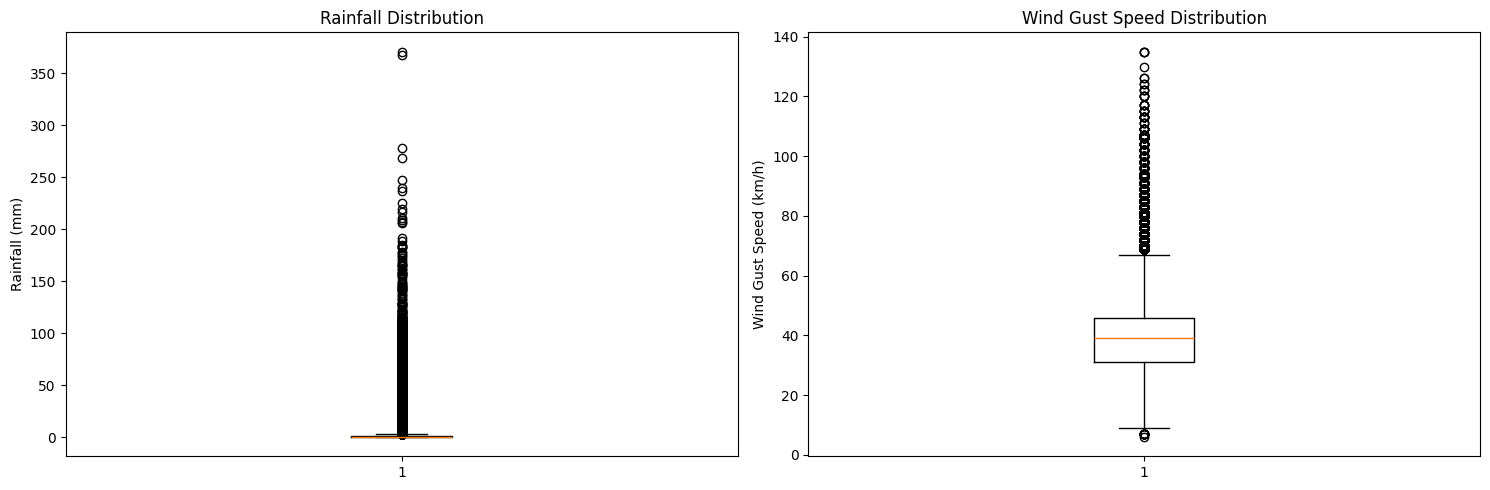

In [5]:
# Visualize outliers in Rainfall and WindGustSpeed
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Rainfall distribution
axes[0].boxplot(df['CurahHujan'].dropna())
axes[0].set_title('Rainfall Distribution')
axes[0].set_ylabel('Rainfall (mm)')

# WindGustSpeed distribution
axes[1].boxplot(df['KecepatanAnginKencang'].dropna())
axes[1].set_title('Wind Gust Speed Distribution')
axes[1].set_ylabel('Wind Gust Speed (km/h)')

plt.tight_layout()
plt.show()

## 3.2 Penanganan Data Non-Numerik (Transformasi Fitur)

Transform categorical variables to numeric using Label Encoding.

In [6]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)

Categorical columns: ['Tanggal', 'Lokasi', 'ArahAnginKencang', 'ArahAnginJam9', 'ArahAnginJam3', 'HujanHariIni', 'HujanBesok']


In [7]:
# 1. Feature Engineering on Date column
# Convert date to datetime and extract Year, Month, Day
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df['Year'] = df['Tanggal'].dt.year
df['Month'] = df['Tanggal'].dt.month
df['Day'] = df['Tanggal'].dt.day

# Drop the original date column as it's no longer needed
df = df.drop('Tanggal', axis=1)

print("Date column converted to Year, Month, Day")
print(df[['Year', 'Month', 'Day']].head())

Date column converted to Year, Month, Day
   Year  Month  Day
0  2010      4   30
1  2014      7   22
2  2014      7   23
3  2014      7   24
4  2014      7   25


In [8]:
# 2. Encoding Categorical Variables
# Using Label Encoding as specified in the document
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Categorical columns to be encoded:", categorical_columns)

for col in categorical_columns:
    le = LabelEncoder()
    # Fit and transform the column, handling unknown values by fitting on all data
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
    print(f"Encoded {col}: {len(le.classes_)} unique values")

Categorical columns to be encoded: ['Lokasi', 'ArahAnginKencang', 'ArahAnginJam9', 'ArahAnginJam3', 'HujanHariIni', 'HujanBesok']
Encoded Lokasi: 49 unique values
Encoded ArahAnginKencang: 16 unique values
Encoded ArahAnginJam9: 16 unique values
Encoded ArahAnginJam3: 16 unique values
Encoded HujanHariIni: 2 unique values
Encoded HujanBesok: 2 unique values


## 3.3 Encoding Variabel Target

Convert the target variable `RainTomorrow` to binary format (0 for 'No', 1 for 'Yes').

In [9]:
# Check the target variable values before encoding
print("Unique values in target variable before encoding:")
print(df['HujanBesok'].value_counts())

# The target variable has already been encoded through the LabelEncoder above
# Check which value is 0 (No) and which is 1 (Yes), assuming alphabetical order
target_encoder = label_encoders['HujanBesok']
print(f"Target variable encoding: {dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_)))}")

# In the LabelEncoder, 'No' would be 0 and 'Yes' would be 1 (alphabetical order)
print("Target variable encoded as: 'No' = 0, 'Yes' = 1")

Unique values in target variable before encoding:
HujanBesok
0    113583
1     31877
Name: count, dtype: int64
Target variable encoding: {'No': np.int64(0), 'Yes': np.int64(1)}
Target variable encoded as: 'No' = 0, 'Yes' = 1


## Final Dataset Overview

After all the transformations, let's check the final dataset.

In [10]:
# Final dataset info
print("Final dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes.value_counts())

# Check for any remaining missing values
print("\nMissing values after processing:")
missing_after = df.isnull().sum().sum()
print(f"Total missing values: {missing_after}")

if missing_after > 0:
    print("Columns with missing values:")
    print(df.isnull().sum()[df.isnull().sum() > 0])

Final dataset shape: (145460, 25)

Data types:
float64    16
int64       6
int32       3
Name: count, dtype: int64

Missing values after processing:
Total missing values: 0


In [11]:
# Display basic statistics of the final dataset
print("\nBasic statistics of the final dataset:")
df.describe()


Basic statistics of the final dataset:


,Lokasi,SuhuMin,SuhuMax,CurahHujan,Penguapan,SinarMatahari,ArahAnginKencang,KecepatanAnginKencang,ArahAnginJam9,ArahAnginJam3,KecepatanAnginJam9,KecepatanAnginJam3,KelembabanJam9,KelembabanJam3,TekananUdaraJam9,TekananUdaraJam3,AwanJam9,AwanJam3,SuhuJam9,SuhuJam3,HujanHariIni,HujanBesok,Year,Month,Day
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.00000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,23.793524,12.193993,23.221337,2.360898,5.468995,7.610612,8.09360,40.035567,6.999526,7.798852,14.043384,18.662601,68.880816,51.539143,1017.649946,1015.256314,4.448437,4.509959,16.990624,21.683306,0.219167,0.219146,2012.769751,6.399615,15.712258
std,14.228687,6.365750,7.088124,8.382488,3.161541,2.729486,4.69411,13.118253,4.515839,4.538135,8.861059,8.716581,18.854765,20.471189,6.728467,6.663973,2.265605,2.092954,6.449221,6.850057,0.413683,0.413669,2.537684,3.427262,8.794789
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.00000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000,2007.000000,1.000000,1.000000
25%,11.000000,7.700000,18.000000,0.000000,4.000000,7.610000,4.00000,31.000000,3.000000,4.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000,0.000000,0.000000,2011.000000,3.000000,8.000000
50%,24.000000,12.100000,22.700000,0.000000,5.470000,7.610000,9.00000,39.000000,7.000000,8.000000,13.000000,18.660000,69.000000,51.540000,1017.650000,1015.260000,4.450000,4.510000,16.800000,21.400000,0.000000,0.000000,2013.000000,6.000000,16.000000
75%,36.000000,16.800000,28.200000,1.000000,5.470000,8.700000,13.00000,46.000000,11.000000,12.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000,0.000000,0.000000,2015.000000,9.000000,23.000000
max,48.000000,33.900000,48.100000,371.000000,145.000000,14.500000,15.00000,135.000000,15.000000,15.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,1.000000,2017.000000,12.000000,31.000000


In [12]:
# Save the prepared dataset
df.to_csv('weatherAUS_prepared.csv', index=False)
print("Prepared dataset saved as 'weatherAUS_prepared.csv'")

Prepared dataset saved as 'weatherAUS_prepared.csv'


## Summary of Data Preparation Steps

1. **Outlier Handling**: Decided not to remove outliers in `Rainfall` and `WindGustSpeed` as Random Forest is robust to outliers and these represent valid extreme weather events.
2. **Feature Engineering**: Extracted Year, Month, and Day from the Date column to capture temporal patterns.
3. **Categorical Encoding**: Applied Label Encoding to all categorical variables including `Location`, `WindGustDir`, `WindDir9am`, `WindDir3pm`, and `RainToday`.
4. **Target Encoding**: The target variable `RainTomorrow` was encoded as binary (0 for 'No', 1 for 'Yes').
5. **Final Dataset**: All variables are now numerical and ready for Random Forest modeling.